In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

### Задача 1
Подберите скорость обучения (eta) и количество итераций

In [4]:
n = X.shape[0]
# ИЗМЕНЕНИЯ (старое)
# eta = 1e-2
# ИЗМЕНЕНИЯ (новое)
eta = 89e-3



n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.089        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [10.612 34.053], MSE = 3047.75
Iteration #10: W_new = [ 1890.02202509 10280.47278088], MSE = 565553607.46
Iteration #20: W_new = [ 181634.08644603 1001458.07501833], MSE = 7272054517864.32
Iteration #30: W_new = [ 3550666.80546651 19580530.85326344], MSE = 3833446837130737.5
Iteration #40: W_new = [12369810.60799578 68215168.38107178], MSE = 6.569465852350987e+16
Iteration #50: W_new = [ 6594392.31632617 36365648.21465915], MSE = 2.7176906147137396e+16
Iteration #60: W_new = [ 439623.6403699  2424139.43559031], MSE = 183029106587012.12
Iteration #70: W_new = [ 2815.54068027 15285.83293452], MSE = 11657627655.97
Iteration #80: W_new = [45.71143877  9.94255032], MSE = 3221.11
Iteration #90: W_new = [44.74696086  3.86979876], MSE = 44.02


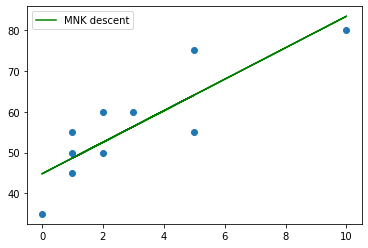

In [5]:
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='MNK descent', c='g')
plt.legend()
plt.show()

### Задача 2
В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [6]:
n = X.shape[0]

eta = 1e-2
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    # ИЗМЕНЕНИЯ (старое)
    # W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
    # ИЗМЕНЕНИЯ (новое) добавил транспонирование X
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    
    #
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27


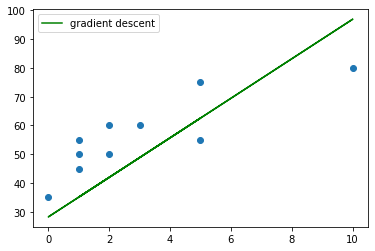

In [7]:
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()

### Задача 3
Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога  𝜖 .

In [8]:
n = X.shape[0]

eta = 1e-2
i = 0
weight_dist = np.inf
min_weight_dist = 2e-2
W = np.array([1, 0.5])

print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

while weight_dist > min_weight_dist:
    y_pred = np.dot(X, W)
    dQ = 2 / X.shape[0] * np.dot(X.T, y_pred - y)
    new_w = W - eta * dQ
    
    weight_dist = np.linalg.norm(new_w - W, ord=2)
    W = new_w
    
    err = calc_mse(y, y_pred)
    i += 1
    
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, weight_dist = {weight_dist}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #10: W_new = [ 6.64172205 10.62940003], weight_dist = 0.36790806281424887, MSE = 752.02
Iteration #20: W_new = [10.02900674 10.16329008], weight_dist = 0.32770038930504414, MSE = 632.72
Iteration #30: W_new = [13.09636548  9.60903915], weight_dist = 0.29900994897603655, MSE = 534.14
Iteration #40: W_new = [15.89487851  9.10159809], weight_dist = 0.2728328083441791, MSE = 452.07
Iteration #50: W_new = [18.44838865  8.63855875], weight_dist = 0.24894737331124467, MSE = 383.75
Iteration #60: W_new = [20.77834901  8.21605636], weight_dist = 0.22715301379884484, MSE = 326.86
Iteration #70: W_new = [22.90433054  7.83054239], weight_dist = 0.20726666440214822, MSE = 279.49
Iteration #80: W_new = [24.84419078  7.47877865], weight_dist = 0.18912128636970613, MSE = 240.06
Iteration #90: W_new = [26.61422391  7.15781043], weight_dist = 0.17256446453316582, MSE = 207.23
Iteration #100: W_new = [28.2

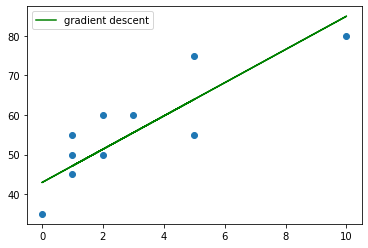

In [9]:
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()